<a href="https://colab.research.google.com/github/gffiveash/PCA/blob/main/GF_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams. Some of these scam e-mails have some offensive content. I don't think anything is worse than R-rated, but I just want to warn you that if you start reading the e-mail text, you might read something offensive. If that's a problem, feel free to e-mail me and we can talk about it more or you can skip the assignment.  

### Q1.

Open the `Phishing_Email.parquet` data. It is available at `https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet`, and you can download it directly using Pandas by providing that URL: `df = pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')`.

We just want to look at the first step of cleaning text data, so you can get an idea of how it works. The `Email Text` variable contains the actual text of the email and the `Email Type` takes the value `Phishing Email` or `Safe Email`. We want to predict which emails are phishing emails from their contents.

Use the `str.split()` method to break the `Phishing Email` values into **tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens. Print the results of your split and examine it.

In words, how would you clean the tokens and use them to predict whether the email is a phishing scam or not? A short summary of the kinds of tasks you would do and how you would run a predictive algorithm is fine.

In [ ]:
! git clone https://github.com/gffiveash/PCA

Cloning into 'PCA'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 54 (delta 5), reused 3 (delta 3), pack-reused 45 (from 1)
Receiving objects: 100% (54/54), 3.90 MiB | 11.36 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_parquet('https://data434.s3.us-east-2.amazonaws.com/Phishing_Email.parquet')

In [ ]:
df.head()

,index,Unnamed: 0,Email Text,Email Type
0,0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
#tokens=df[df['Email Type']=='Phishing Email']
newdf=df['Email Text']
print(newdf)

0        re : 6 . 1100 , disc : uniformitarianism , re ...
1        the other side of * galicismos * * galicismo *...
2        re : equistar deal tickets are you still avail...
3        \nHello I am your hot lil horny toy.\n    I am...
4        software at incredibly low prices ( 86 % lower...
                               ...                        
18629    date a lonely housewife always wanted to date ...
18630    request submitted : access request for anita ....
18631    re : important - prc mtg hi dorn & john , as y...
18632    press clippings - letter on californian utilit...
18633                                                empty
Name: Email Text, Length: 18634, dtype: object


In [ ]:
tokens=newdf.str.split()
tokens.head(10)

,Email Text
0,"[re, :, 6, ., 1100, ,, disc, :, uniformitarian..."
1,"[the, other, side, of, *, galicismos, *, *, ga..."
2,"[re, :, equistar, deal, tickets, are, you, sti..."
3,"[Hello, I, am, your, hot, lil, horny, toy., I,..."
4,"[software, at, incredibly, low, prices, (, 86,..."
5,"[global, risk, management, operations, sally, ..."
6,"[On, Sun,, Aug, 11,, 2002, at, 11:17:47AM, +01..."
7,"[entourage, ,, stockmogul, newsletter, ralph, ..."
8,"[we, owe, you, lots, of, money, dear, applican..."
9,"[re, :, coastal, deal, -, with, exxon, partici..."


In [ ]:
print(tokens)

0        [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1        [the, other, side, of, *, galicismos, *, *, ga...
2        [re, :, equistar, deal, tickets, are, you, sti...
3        [Hello, I, am, your, hot, lil, horny, toy., I,...
4        [software, at, incredibly, low, prices, (, 86,...
                               ...                        
18629    [date, a, lonely, housewife, always, wanted, t...
18630    [request, submitted, :, access, request, for, ...
18631    [re, :, important, -, prc, mtg, hi, dorn, &, j...
18632    [press, clippings, -, letter, on, californian,...
18633                                              [empty]
Name: Email Text, Length: 18634, dtype: object


I would remove any punctuation (colons, periods, commas, etc.) from the tokens because they don't give us any indication of whether the email is a phishing attempt or not. Similarily, I'd remove any filler words, such as a, the, of, we, at, are, with, etc. Since these words are commonly used in emails, it will not help our predictions of whether an email is phishing or safe. So, I'd essentially clean the tokens until there are only unique words left, removing all the unnecessary noise from punctuation and filler words. To begin prediction, we'd one-hot-encode the unique tokens, creating a binary that will indicate the presence of specific words in the email text. Then, we can run a classification model to predict whether the emails are a phishing scame or not.However, given that there are 18,000+ emails in this dataset, there will be thousands of unique words acting as features in our predictive model. This likely will create multi-colinearity, and PCA is one of the best ways to tackle mutli-colinearity and reduce the number of features, while still maintaining the variation/meaning from the original dataset.






### Q2.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [ ]:
import pickle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
with open('/content/PCA/05_PCA/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

In [ ]:
#print(token_count)

In [ ]:
#print(token_freq)

In [ ]:
len(token_freq)

48691

In [ ]:
#Code professor provided, but does not work
#with open('all_tokens.pickle', 'rb') as file:
#    all_tokens = pickle.load(file)

#from collections import Counter
#token_count = Counter(all_tokens)
#token_freq = token_count.most_common()

Plot a histogram of the occurrences of tokens. What do you notice about the frequency of occurrence of different tokens? How does it look?

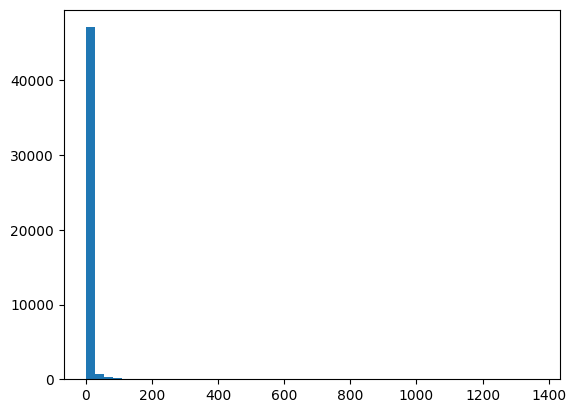

In [ ]:
frequencydf=pd.DataFrame(token_freq,columns=['token','frequency'])
plt.hist(frequencydf['frequency'],bins=50)
plt.show()

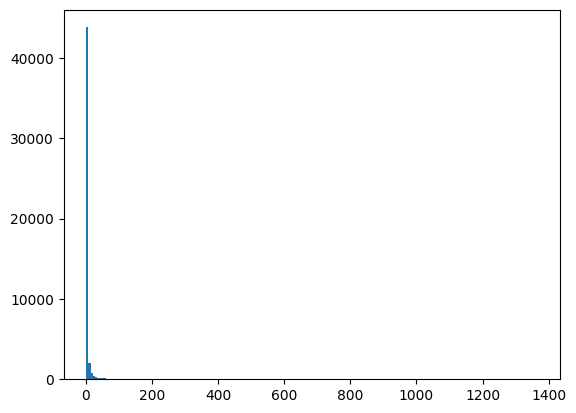

In [ ]:
frequencydf=pd.DataFrame(token_freq,columns=['token','frequency'])
plt.hist(frequencydf['frequency'],bins=200)
plt.show()

In [ ]:
print(frequencydf)

            token  frequency
0             new       1365
1            date       1202
2             get       1052
3          please       1022
4           enron        927
...           ...        ...
48686   truck[1].          1
48687       feet,          1
48688  housewifes          1
48689        dorn          1
48690   clippings          1

[48691 rows x 2 columns]


In [ ]:
frequencydf.describe()

,frequency
count,48691.000000
mean,5.687889
std,27.717476
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1365.000000


What do you notice about the frequency of occurrence of different tokens? How does it look?

When I plot the frequency of tokens, I see that a large majority of the tokens occur in the email text once. When we use .describe(), we see that at least 75% of the frequency data points are below 2. For the few data points with a greater frequency, like 'new' which occurs 1,365 times, you cannot even see it visualized on the histogram. The histogram is very skewed to the right with an incredibly narrow spread of values.

### Q3.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [ ]:
df=pd.read_parquet('/content/PCA/05_PCA/Phishing_clean.parquet')

In [ ]:
df.shape

(18634, 2712)

In [ ]:
df.head(10)

,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Question 1
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X=df.iloc[:,1:]

In [ ]:
print(X)

       new  date  get  please  enron  like  2002  would  one  message  ...  \
0        0     0    0       0      0     0     0      0    0        0  ...   
1        0     0    0       0      0     0     0      0    0        0  ...   
2        1     0    0       0      0     0     0      0    0        0  ...   
3        0     0    0       0      0     0     0      0    1        0  ...   
4        0     0    0       0      0     0     0      0    0        0  ...   
...    ...   ...  ...     ...    ...   ...   ...    ...  ...      ...  ...   
18629    0     1    0       0      0     0     0      0    0        0  ...   
18630    0     0    0       1      1     0     0      0    0        0  ...   
18631    0     0    0       0      0     0     0      0    0        0  ...   
18632    0     0    0       1      0     0     0      0    0        0  ...   
18633    0     0    0       0      0     0     0      0    0        0  ...   

       ï¿½ï¿½  safety  yap  ypil  maintain  procedures  tip  el

In [ ]:
y=df['Email Type']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=125)

In [ ]:
# Professor's work:
#from sklearn.metrics import r2_score
#y = df['Email Type']
#X = df.drop('Email Type',axis=1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

#lm_0 = LinearRegression(fit_intercept=False).fit(X_train,y_train)
#y_hat_test_0 = lm_0.predict(X_test)
#y_hat_train_0 = lm_0.predict(X_train)
#print('train: ', r2_score(y_hat_train_0,y_train) )
#print('test: ', r2_score(y_hat_test_0,y_test) )

train:  0.6210107280960204
test:  -0.00026838432670373


In [ ]:
# Question 2
from sklearn.linear_model import LinearRegression
myRegression=LinearRegression(fit_intercept=False).fit(X_train,y_train)
y_hat_test=myRegression.predict(X_test)
y_hat_train=myRegression.predict(X_train)

test_residuals=y_test-y_hat_test
SSE=np.inner(test_residuals,test_residuals)
rsqtest=1-SSE/np.inner(y_test-np.mean(y_test),y_test-np.mean(y_test))
print('Test RSQ: '+str(rsqtest))

train_residuals=y_train-y_hat_train
SSE=np.inner(train_residuals,train_residuals)
rsqtrain=1-SSE/np.inner(y_train-np.mean(y_train),y_train-np.mean(y_train))
print('Train RSQ: '+str(rsqtrain))

Test RSQ: -1.4727860414155099e+22
Train RSQ: 0.6948655461957196


In [ ]:
results=pd.DataFrame({'variable':myRegression.feature_names_in_,'coefficient':myRegression.coef_})
results['abs'] = np.abs(results['coefficient'])
results.sort_values('abs',ascending=False)

,variable,coefficient,abs
710,1997,-1.415784e+13,1.415784e+13
421,1995,1.158467e+13,1.158467e+13
1133,"19,",-1.025713e+13,1.025713e+13
340,2005,-9.773947e+12,9.773947e+12
1146,-0400,-8.062341e+12,8.062341e+12
...,...,...,...
1399,union,2.822876e-04,2.822876e-04
565,east,-2.746582e-04,2.746582e-04
2268,ravages,-1.068115e-04,1.068115e-04
457,due,-6.484985e-05,6.484985e-05


Question 3: What words have the largest coefficients in absolute value and most strongly influence predictions?

The variable with the largest coefficients in absolute value, and therefore have the most influence on predictions, is 1997. In fact, the top 5 variables with the largest coefficient are all numbers. In comparison to words, I don't believe numbers have the same predictive powers. It is hard to tell if an email is a phishing scam or not simply from numbers.

### Q4.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

In [ ]:
df=pd.read_parquet('/content/PCA/05_PCA/Phishing_clean.parquet')
X=df.iloc[:,1:]
y=df['Email Type']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=100)

In [ ]:
pca=PCA(n_components=2)
pca=pca.fit(X_train)
Z_train = pca.transform(X_train)

In [ ]:
# Do I make a scatterplot for the train set?
#sns.scatterplot(x=Z_train[:,0],y=Z_train[:,1],hue=y_train)

In [ ]:
pca=PCA(n_components=2)
pca=pca.fit(X_test)
Z_test = pca.transform(X_test)

<Axes: >

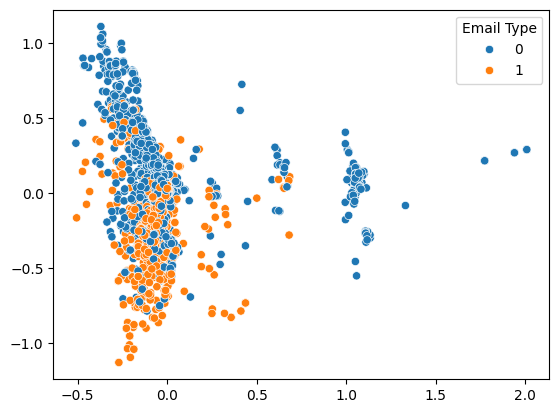

In [ ]:
sns.scatterplot(x=Z_test[:,0],y=Z_test[:,1],hue=y_test)

Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

The blue dots are safe emails and the orange dots are phishing scams. This scatterplot shows how, for principal component one, there isn't a huge distinction between the phishing and safe emails -- they are somewhat interspersed. This means that it may be difficult to decipher if an email if a scam or not. However, there are some clusters of safe emails further along the x-axis, which may more strongly identify an email as safe. For the second principal component, there is a tendency for phishing emails to cluster lower and safe emails to cluster higher on the scatter plot. This means the two clusters vary for PC2, but since they are concentrated around the same position on the x-axis, they are similar for PC1.

### Q5.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [ ]:
pca=PCA(n_components=2610)
pca=pca.fit(X_test)
pca=pca.fit(X_train)
Z_test = pca.transform(X_test)
Z_train = pca.transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
myRegression=LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat_test=myRegression.predict(Z_test)
y_hat_train=myRegression.predict(Z_train)

test_residuals=y_test-y_hat_test
SSE=np.inner(test_residuals,test_residuals)
rsqtest=1-SSE/np.inner(y_test-np.mean(y_test),y_test-np.mean(y_test))
print('Test RSQ: '+str(rsqtest))

train_residuals=y_train-y_hat_train
SSE=np.inner(train_residuals,train_residuals)
rsqtrain=1-SSE/np.inner(y_train-np.mean(y_train),y_train-np.mean(y_train))
print('Train RSQ: '+str(rsqtrain))

Test RSQ: 0.034306306606616044
Train RSQ: 0.12342072275942528


How does this performance compare to the linear regression?
The test set performs much better, after performing PCA. Normal linear regression on the test set produced a R-squared of -1.47 and after PCA, it is 0.034, which is much better.

### Q6.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.